Bearbetad data har sparats till /Users/benereta/PycharmProjects/PythonProject6/persons_received_unemployment_benefits_fund_sex_year_processed.csv

Första raderna av den bearbetade datan:
   year gender  persons
0  1999    men   336793
1  1999  women   424136
2  2000    men   302311
3  2000  women   388534
4  2001    men   252901


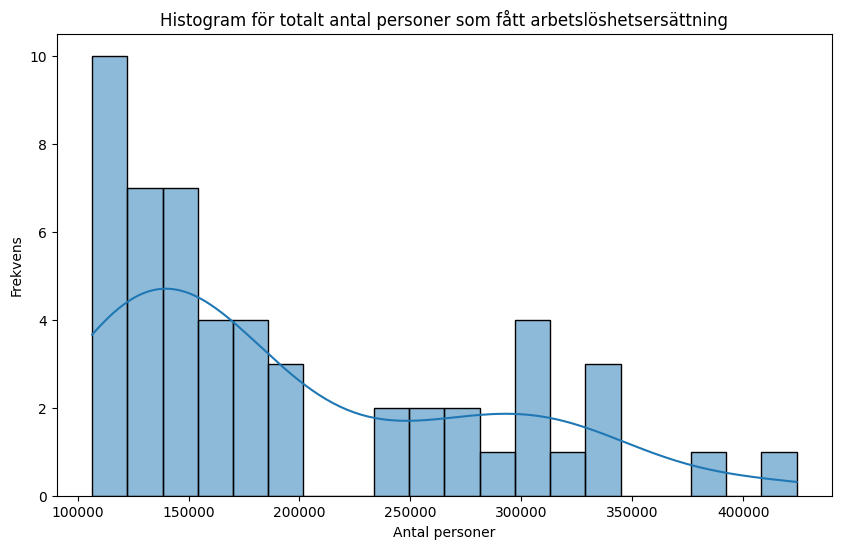

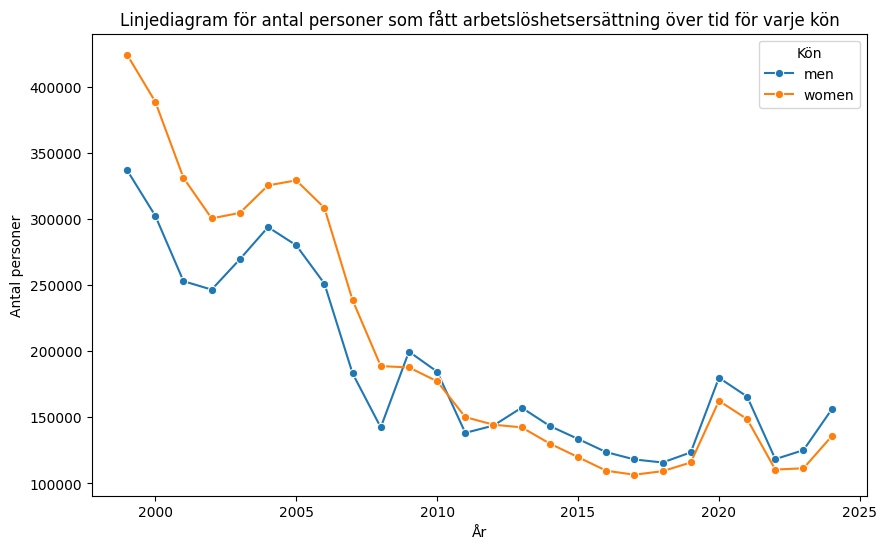

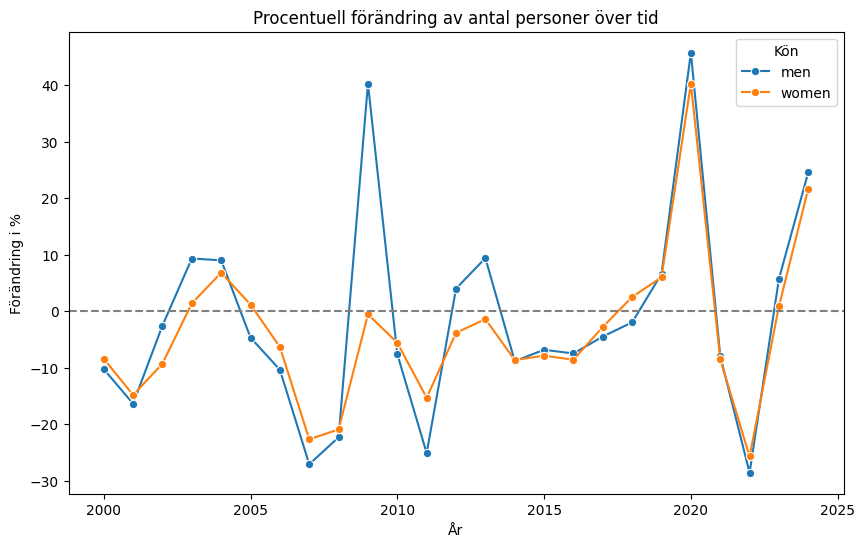


Procentuell förändring av antal personer per år:
    year gender  percent_change
0   1999    men             NaN
1   1999  women             NaN
2   2000    men      -10.238336
3   2000  women       -8.394006
4   2001    men      -16.344096
5   2001  women      -14.805654
6   2002    men       -2.523122
7   2002  women       -9.254129
8   2003    men        9.317702
9   2003  women        1.388255
10  2004    men        9.009240
11  2004  women        6.821279
12  2005    men       -4.670336
13  2005  women        1.173610
14  2006    men      -10.348189
15  2006  women       -6.316480
16  2007    men      -27.052723
17  2007  women      -22.639282
18  2008    men      -22.276520
19  2008  women      -20.898294
20  2009    men       40.246858
21  2009  women       -0.536329
22  2010    men       -7.591164
23  2010  women       -5.575507
24  2011    men      -25.086592
25  2011  women      -15.293938
26  2012    men        3.997714
27  2012  women       -3.820506
28  2013    men       

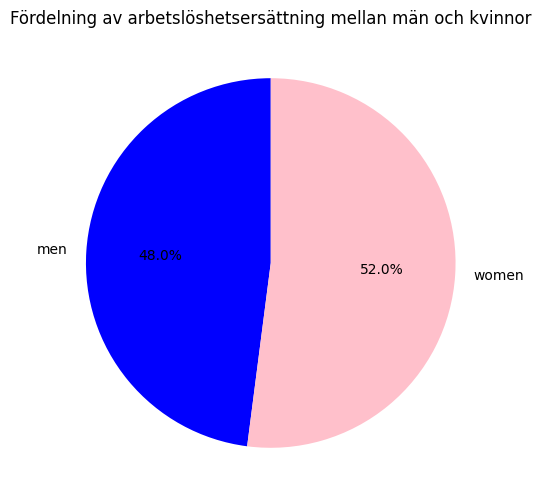


Data för året 2024:
      year  unemployment_insurance_fund_id        unemployment_insurance_fund  \
50    2024                               4                            Handels   
51    2024                               4                            Handels   
102   2024                               6                                 GS   
103   2024                               6                                 GS   
154   2024                              10               Livsmedelsarbetarnas   
155   2024                              10               Livsmedelsarbetarnas   
206   2024                              14                           Unionens   
207   2024                              14                           Unionens   
258   2024                              19                Transportarbetarnas   
259   2024                              19                Transportarbetarnas   
310   2024                              22   Hotell- och restauranganställdas   
311   2

<Figure size 1400x700 with 0 Axes>

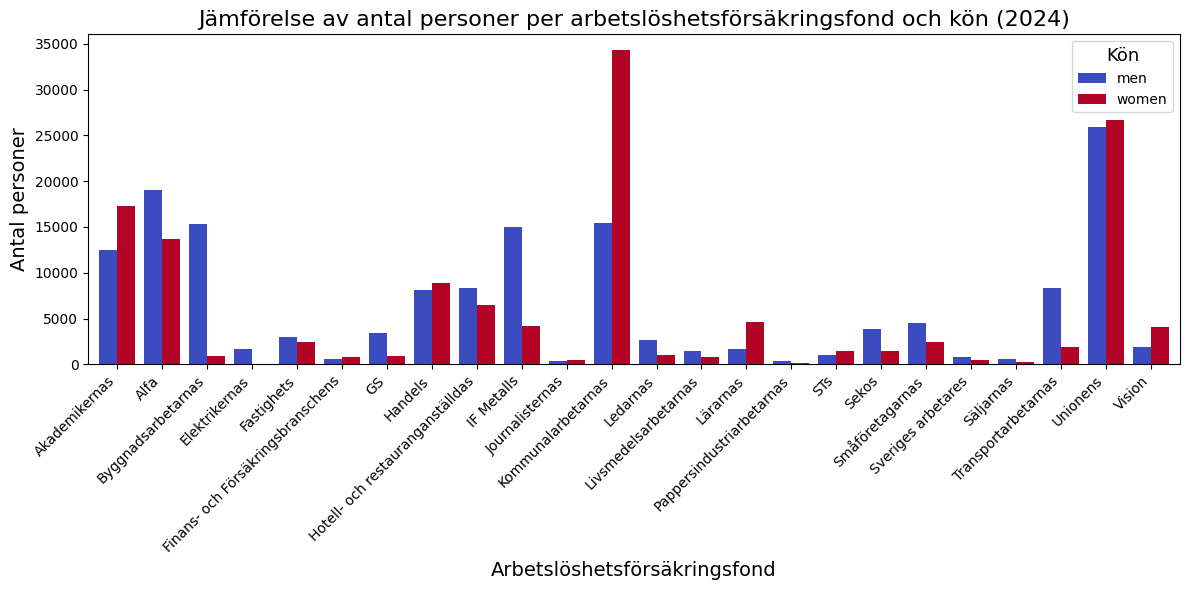


Gruppdata per arbetslöshetsförsäkringsfond och kön (2024):
gender                               men  women
unemployment_insurance_fund                    
Akademikernas                      12459  17251
Alfa                               19093  13640
Byggnadsarbetarnas                 15293    931
Elektrikernas                       1633     67
Fastighets                          2947   2495
Finans- och Försäkringsbranschens    630    775
GS                                  3467    876
Handels                             8139   8894
Hotell- och restauranganställdas    8362   6483
IF Metalls                         15033   4137
Journalisternas                      390    516
Kommunalarbetarnas                 15454  34322
Ledarnas                            2688   1044
Livsmedelsarbetarnas                1432    805
Lärarnas                            1625   4584
Pappersindustriarbetarnas            386    142
STs                                  975   1473
Sekos                       

/Users/benereta/PycharmProjects/PythonProject6/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


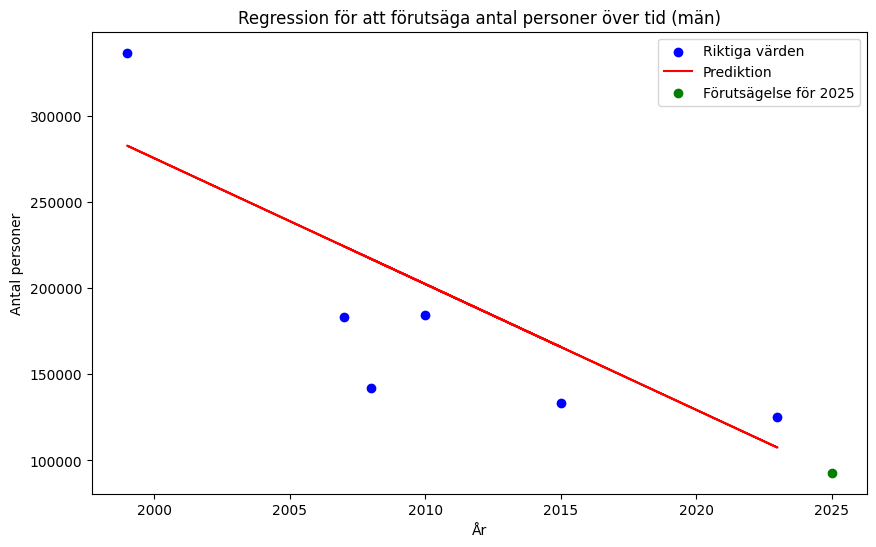

/Users/benereta/PycharmProjects/PythonProject6/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Förutsagd antal personer för kvinnor 2025: 53458

Förutsägelser för kvinnor (2025):
Förutsagt antal personer för kvinnor 2025: 53458


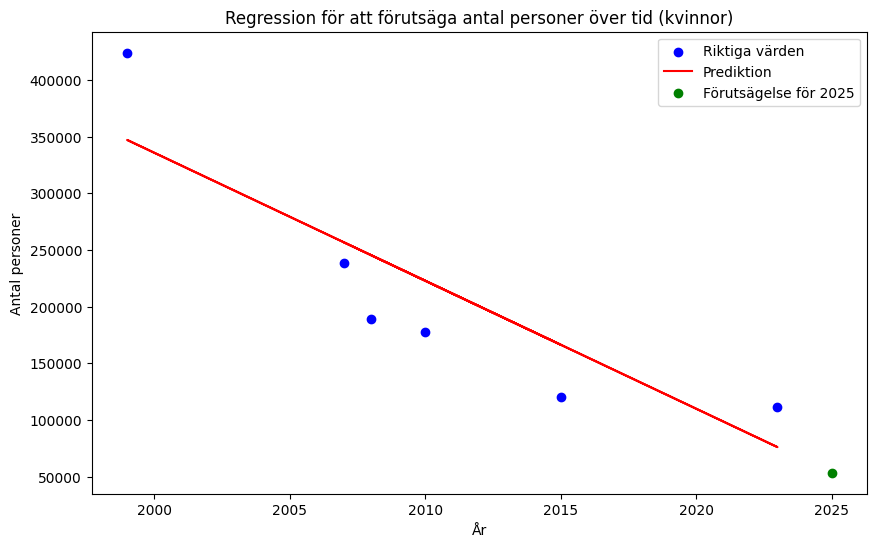

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Läs in datasetet
csv_file_path = r"/Users/benereta/PycharmProjects/PythonProject6/persons_received_unemployment_benefits_fund_sex_year.csv"
df = pd.read_csv(csv_file_path, sep=',')

# Rensa kolumnnamn och fyll i saknade värden med 0
df.columns = df.columns.str.strip()
df.fillna(0, inplace=True)

# Summera 'persons' per år och kön
df_total = df.groupby(['year', 'gender'], as_index=False)['persons'].sum()

# Spara den bearbetade datan till en ny CSV-fil
output_csv_path = r"/Users/benereta/PycharmProjects/PythonProject6/persons_received_unemployment_benefits_fund_sex_year_processed.csv"
df_total.to_csv(output_csv_path, index=False)
print(f"Bearbetad data har sparats till {output_csv_path}")

# Visa första raderna av den bearbetade datan i terminalen
print("\nFörsta raderna av den bearbetade datan:")
print(df_total.head())

# 1. Histogram över totalt antal personer som fått arbetslöshetsersättning
plt.figure(figsize=(10, 6))
sns.histplot(df_total['persons'], bins=20, kde=True)
plt.title('Histogram för totalt antal personer som fått arbetslöshetsersättning')
plt.xlabel('Antal personer')
plt.ylabel('Frekvens')
plt.show()

# 2. Linjediagram för att visa trender över tid för varje kön
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_total, x='year', y='persons', hue='gender', marker='o')
plt.title('Linjediagram för antal personer som fått arbetslöshetsersättning över tid för varje kön')
plt.xlabel('År')
plt.ylabel('Antal personer')
plt.legend(title='Kön')
plt.show()

# 3. Procentuell förändring av antal personer över tid
df_total['percent_change'] = df_total.groupby('gender')['persons'].pct_change() * 100

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_total, x='year', y='percent_change', hue='gender', marker='o')
plt.axhline(0, linestyle='--', color='gray')  # Nollinje för att visa när det minskar
plt.title('Procentuell förändring av antal personer över tid')
plt.xlabel('År')
plt.ylabel('Förändring i %')
plt.legend(title='Kön')
plt.show()

# Visa procentuell förändring i terminalen
print("\nProcentuell förändring av antal personer per år:")
print(df_total[['year', 'gender', 'percent_change']])

# 4. Tårtdiagram för fördelning mellan män och kvinnor
df_gender = df.groupby('gender', as_index=False)['persons'].sum()
sizes = df_gender['persons'].values
labels = df_gender['gender']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title('Fördelning av arbetslöshetsersättning mellan män och kvinnor')
plt.show()

# 5. Filtrera data för året 2024
df_2024 = df[df['year'] == 2024]
print("\nData för året 2024:")
print(df_2024)

# Kontrollera om 'unemployment_insurance_fund' finns i datasetet
if 'unemployment_insurance_fund' not in df.columns:
    print("'unemployment_insurance_fund' kolumnen saknas i datasetet.")
else:
    # Gruppdata per 'unemployment_insurance_fund' och kön, samt summering av antal personer
    grouped_fund_gender = df_2024.groupby(['unemployment_insurance_fund', 'gender'])['persons'].sum().unstack()

    # Visualisering av jämförelse av antal personer per 'unemployment_insurance_fund' och kön
    plt.figure(figsize=(14, 7))
    grouped_fund_gender.plot(kind='bar', figsize=(12, 6), cmap='coolwarm', width=0.8)
    plt.title('Jämförelse av antal personer per arbetslöshetsförsäkringsfond och kön (2024)', fontsize=16)
    plt.xlabel('Arbetslöshetsförsäkringsfond', fontsize=14)
    plt.ylabel('Antal personer', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Kön', title_fontsize='13')
    plt.tight_layout()
    plt.show()

    print("\nGruppdata per arbetslöshetsförsäkringsfond och kön (2024):")
    print(grouped_fund_gender)

# Maskininlärning: Regression för män
df_regression_men = df_total[df_total['gender'] == 'men']
X_men = df_regression_men[['year']]
y_men = df_regression_men['persons']

X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(X_men, y_men, test_size=0.2, random_state=42)

model_men = LinearRegression()
model_men.fit(X_train_men, y_train_men)

y_pred_men = model_men.predict(X_test_men)
pred_men_2025 = model_men.predict([[2025]])[0]
print(f"Förutsagd antal personer för män 2025: {pred_men_2025:.0f}")

# Visa resultat av regression för män
print("\nFörutsägelser för män (2025):")
print(f"Förutsagt antal personer för män 2025: {pred_men_2025:.0f}")

# Regression resultat för män
plt.figure(figsize=(10, 6))
plt.scatter(X_test_men, y_test_men, label='Riktiga värden', color='blue')
plt.plot(X_test_men, y_pred_men, label='Prediktion', color='red')
plt.scatter(2025, pred_men_2025, color='green', label='Förutsägelse för 2025', zorder=5)
plt.title('Regression för att förutsäga antal personer över tid (män)')
plt.xlabel('År')
plt.ylabel('Antal personer')
plt.legend()
plt.show()

# Maskininlärning: Regression för kvinnor
df_regression_women = df_total[df_total['gender'] == 'women']
X_women = df_regression_women[['year']]
y_women = df_regression_women['persons']

X_train_women, X_test_women, y_train_women, y_test_women = train_test_split(X_women, y_women, test_size=0.2, random_state=42)

model_women = LinearRegression()
model_women.fit(X_train_women, y_train_women)

y_pred_women = model_women.predict(X_test_women)
pred_women_2025 = model_women.predict([[2025]])[0]
print(f"Förutsagd antal personer för kvinnor 2025: {pred_women_2025:.0f}")

# Visa resultat av regression för kvinnor
print("\nFörutsägelser för kvinnor (2025):")
print(f"Förutsagt antal personer för kvinnor 2025: {pred_women_2025:.0f}")

# Regression resultat för kvinnor
plt.figure(figsize=(10, 6))
plt.scatter(X_test_women, y_test_women, label='Riktiga värden', color='blue')
plt.plot(X_test_women, y_pred_women, label='Prediktion', color='red')
plt.scatter(2025, pred_women_2025, color='green', label='Förutsägelse för 2025', zorder=5)
plt.title('Regression för att förutsäga antal personer över tid (kvinnor)')
plt.xlabel('År')
plt.ylabel('Antal personer')
plt.legend()
plt.show()
